In [53]:
# https://youtu.be/XyX5HNuv-xE
# https://youtu.be/q-p8v1Bxvac
"""
Standard Unet
Model not compiled here, instead will be done externally to make it
easy to test various loss functions and optimizers. 
"""


from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda


################################################################
def multi_unet_model(n_classes=4, IMG_HEIGHT=256, IMG_WIDTH=256, IMG_CHANNELS=1):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    #Expansive path 
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
     
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
     
    outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    
    #NOTE: Compile the model in the main program to make it easy to test with various loss functions
    #model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    #model.summary()
    
    return model
 

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Class values in the dataset are ...  [0 1 2 3 4 5 6 7 8 9]


Model: "functional_55"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_55      │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1045         │ (None, 256, 256,  │        160 │ input_layer_55[0… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_495         │ (None, 256, 256,  │          0 │ conv2d_1045[0][0] │
│ (Dropout)           │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1046         │ (None, 256, 256,  │      2,320 │ dropout_495[0][0] │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_220   │ (None, 128, 128,  │          0 │ conv2d_1046[0][0] │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1047         │ (None, 128, 128,  │      4,640 │ max_pooling2d_22… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_496         │ (None, 128, 128,  │          0 │ conv2d_1047[0][0] │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1048         │ (None, 128, 128,  │      9,248 │ dropout_496[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_221   │ (None, 64, 64,    │          0 │ conv2d_1048[0][0] │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1049         │ (None, 64, 64,    │     18,496 │ max_pooling2d_22… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_497         │ (None, 64, 64,    │          0 │ conv2d_1049[0][0] │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1050         │ (None, 64, 64,    │     36,928 │ dropout_497[0][0] │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_222   │ (None, 32, 32,    │          0 │ conv2d_1050[0][0] │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1051         │ (None, 32, 32,    │     73,856 │ max_pooling2d_22… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_498         │ (None, 32, 32,    │          0 │ conv2d_1051[0][0] │
│ (Dropout)           │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1052         │ (None, 32, 32,    │    147,584 │ dropout_498[0][0] │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_223   │ (None, 16, 16,    │          0 │ conv2d_1052[0][0

 Total params: 1,940,970 (7.40 MB)

 Trainable params: 1,940,970 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.1532 - loss: 2.2646 - val_accuracy: 0.3302 - val_loss: 2.1845
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3004 - loss: 2.0756 - val_accuracy: 0.3886 - val_loss: 1.5490
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3599 - loss: 1.9303 - val_accuracy: 0.6157 - val_loss: 1.9411
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4969 - loss: 1.6194 - val_accuracy: 0.7496 - val_loss: 1.9505
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6158 - loss: 1.6413 - val_accuracy: 0.8384 - val_loss: 1.7580
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7088 - loss: 1.3649 - val_accuracy: 0.9233 - val_loss: 1.2403
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7859 - loss: 0.9412 - val_accuracy: 0.9418 - val_loss: 0.6453
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8540 - loss: 1.0518 - val_accuracy: 0.9437 - val_loss: 0.5885
Epoch 9/50
1/1 ━

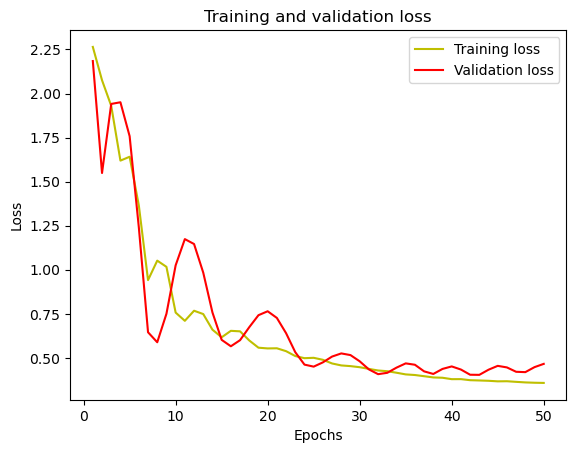

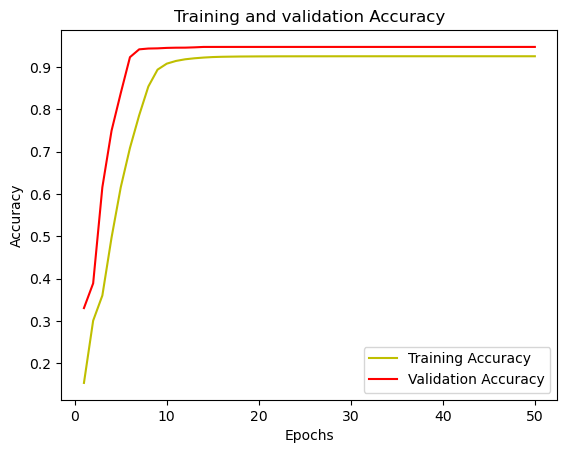

In [112]:
# https://youtu.be/XyX5HNuv-xE
"""
Author: Dr. Sreenivas Bhattiprolu

Multiclass semantic segmentation using U-Net

Including segmenting large images by dividing them into smaller patches 
and stiching them back

To annotate images and generate labels, you can use APEER (for free):
www.apeer.com 
"""



from keras.utils import normalize
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread  # Import imread from skimage
from skimage.transform import resize  # Import resize from skimage

#Resizing images, if needed
SIZE_X = 256 
SIZE_Y = 256
n_classes=10 #Number of classes for segmentation

#Capture training image info as a list
train_images = []
image_extensions = ["*.png", "*.jpg"]

# Specify the directory where the images are located
directory_path = "/Users/krishna/Desktop/stealth-startup/train1/images/"

# Loop through each extension and gather images
for extension in image_extensions:
    # Use glob to find all images with the current extension
    for img_path in glob.glob(os.path.join(directory_path, extension)):
        img = cv2.imread(img_path, 0)  # Read image in grayscale
        img = cv2.resize(img, (SIZE_Y, SIZE_X))  # Optionally resize
        train_images.append(img)
# for directory_path in glob.glob("/Users/krishna/Desktop/stealth-startup/train1/images/"):
#     for img_path in glob.glob(os.path.join(directory_path, "*.tif")):
#         img = cv2.imread(img_path, 0)       
#         img = cv2.resize(img, (SIZE_Y, SIZE_X))
#         train_images.append(img)
       
#Convert list to array for machine learning processing        
train_images = np.array(train_images)

#Capture mask/label info as a list
# train_masks = []         
        
# for directory_path in glob.glob("/Users/krishna/Desktop/stealth-startup/train1/masks/"):
#     for mask_path in glob.glob(os.path.join(directory_path, "*.tiff")):
#         mask = cv2.imread(mask_path, 0)       
#         #mask = cv2.resize(mask, (SIZE_Y, SIZE_X), interpolation = cv2.INTER_NEAREST)  #Otherwise ground truth changes due to interpolation
#         train_masks.append(mask)
        
# #Convert list to array for machine learning processing          
# train_masks = np.array(train_masks)



train_masks = []
# Loop through the directory and read each mask
for directory_path in glob.glob("/Users/krishna/Desktop/stealth-startup/train1/combine_masks/"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.tiff")):
            # Read the mask using skimage's imread
        mask = imread(mask_path)
            # Resize the mask to the desired size
        mask = resize(mask, (SIZE_Y, SIZE_X), mode='constant', preserve_range=True)
       # Expand the dimensions to make it compatible for model input if needed (e.g., add a channel dimension)
        mask = np.expand_dims(mask, axis=-1)
            # Append the processed mask to the list
        train_masks.append(mask)
# Convert the list of masks into a NumPy array for further machine learning processing
train_masks = np.round(train_masks).astype(int)





###############################################
#Encode labels... but multi dim array so need to flatten, encode and reshape
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
n, h, w, c = train_masks.shape
train_masks_reshaped = train_masks.reshape(-1,1)
train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped)
train_masks_encoded_original_shape = train_masks_reshaped_encoded.reshape(n, h, w)

# np.unique(train_masks_encoded_original_shape)

#################################################
train_images = np.expand_dims(train_images, axis=3)
train_images = normalize(train_images, axis=1)

train_masks_input = np.expand_dims(train_masks_encoded_original_shape, axis=3)

#Create a subset of data for quick testing
#Picking 10% for testing and remaining for training
from sklearn.model_selection import train_test_split
X1, X_test, y1, y_test = train_test_split(train_images, train_masks_input, test_size = 0.10, random_state = 0)

#Further split training data t a smaller subset for quick testing of models
X_train, X_do_not_use, y_train, y_do_not_use = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

print("Class values in the dataset are ... ", np.unique(y_train))  # 0 is the background/few unlabeled 

from keras.utils import to_categorical
train_masks_cat = to_categorical(y_train, num_classes=n_classes)
y_train_cat = train_masks_cat.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], n_classes))



test_masks_cat = to_categorical(y_test, num_classes=n_classes)
y_test_cat = test_masks_cat.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], n_classes))



###############################################################
from sklearn.utils import class_weight
# class_weights = class_weight.compute_class_weight('balanced',
#                                                  np.unique(train_masks_reshaped_encoded),
#                                                  train_masks_reshaped_encoded)


# Compute class weights
# class_weights = class_weight.compute_class_weight('balanced',np.unique(train_masks_reshaped_encoded),train_masks_reshaped_encoded)
# print("Class weights are...:", class_weights)
train_masks_reshaped_encoded_flat = train_masks_reshaped_encoded.flatten()

# Compute class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_masks_reshaped_encoded_flat),
    y=train_masks_reshaped_encoded_flat
)


IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]




def get_model():
    return multi_unet_model(n_classes=n_classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)



model = get_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

#If starting with pre-trained weights. 
#model.load_weights('???.hdf5')

history = model.fit(X_train, y_train_cat, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=50, 
                    validation_data=(X_test, y_test_cat), 
                    #class_weight=class_weights,
                    shuffle=False)
                    


# model.save('test.hdf5')
# #model.save('sandstone_50_epochs_catXentropy_acc_with_weights.hdf5')
# ############################################################
# #Evaluate the model
# 	# evaluate model
_, acc = model.evaluate(X_test, y_test_cat)
print("Accuracy is = ", (acc * 100.0), "%")


# ###
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


##################################
# model = get_model()
# model.load_weights('test.hdf5')  
# #model.load_weights('sandstone_50_epochs_catXentropy_acc_with_weights.hdf5')  

# #IOU
# y_pred=model.predict("/Users/krishna/Desktop/stealth-startup/test1")
# y_pred_argmax=np.argmax(y_pred, axis=3)

# #################################################

# #Using built in keras function
# from keras.metrics import MeanIoU
# n_classes = 10
# IOU_keras = MeanIoU(num_classes=n_classes)  
# IOU_keras.update_state(y_test[:,:,:,0], y_pred_argmax)
# print("Mean IoU =", IOU_keras.result().numpy())


# #To calculate I0U for each class...
# values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
# print(values)
# class1_IoU = values[0,0]/(values[0,0] + values[0,1] + values[0,2] + values[0,3] + values[1,0]+ values[2,0]+ values[3,0])
# class2_IoU = values[1,1]/(values[1,1] + values[1,0] + values[1,2] + values[1,3] + values[0,1]+ values[2,1]+ values[3,1])
# class3_IoU = values[2,2]/(values[2,2] + values[2,0] + values[2,1] + values[2,3] + values[0,2]+ values[1,2]+ values[3,2])
# class4_IoU = values[3,3]/(values[3,3] + values[3,0] + values[3,1] + values[3,2] + values[0,3]+ values[1,3]+ values[2,3])

# print("IoU for class1 is: ", class1_IoU)
# print("IoU for class2 is: ", class2_IoU)
# print("IoU for class3 is: ", class3_IoU)
# print("IoU for class4 is: ", class4_IoU)

# plt.imshow(train_images[0, :,:,0], cmap='gray')
# plt.imshow(train_masks[0], cmap='gray')
# #######################################################################
# #Predict on a few images
# #model = get_model()
# #model.load_weights('???.hdf5')  
# import random
# test_img_number = random.randint(0, len(X_test))
# test_img = X_test[test_img_number]
# ground_truth=y_test[test_img_number]
# test_img_norm=test_img[:,:,0][:,:,None]
# test_img_input=np.expand_dims(test_img_norm, 0)
# prediction = (model.predict(test_img_input))
# predicted_img=np.argmax(prediction, axis=3)[0,:,:]


# plt.figure(figsize=(12, 8))
# plt.subplot(231)
# plt.title('Testing Image')
# plt.imshow(test_img[:,:,0], cmap='gray')
# plt.subplot(232)
# plt.title('Testing Label')
# plt.imshow(ground_truth[:,:,0], cmap='jet')
# plt.subplot(233)
# plt.title('Prediction on test image')
# plt.imshow(predicted_img, cmap='jet')
# plt.show()

# ####################################################################

# # Predict on large image

# # Apply a trained model on large image

# from patchify import patchify, unpatchify

# large_image = cv2.imread('large_images/large_image.tif', 0)
# #This will split the image into small images of shape [3,3]
# patches = patchify(large_image, (128, 128), step=128)  #Step=256 for 256 patches means no overlap

# predicted_patches = []
# for i in range(patches.shape[0]):
#     for j in range(patches.shape[1]):
#         print(i,j)
        
#         single_patch = patches[i,j,:,:]       
#         single_patch_norm = np.expand_dims(normalize(np.array(single_patch), axis=1),2)
#         single_patch_input=np.expand_dims(single_patch_norm, 0)
#         single_patch_prediction = (model.predict(single_patch_input))
#         single_patch_predicted_img=np.argmax(single_patch_prediction, axis=3)[0,:,:]

#         predicted_patches.append(single_patch_predicted_img)

# predicted_patches = np.array(predicted_patches)

# predicted_patches_reshaped = np.reshape(predicted_patches, (patches.shape[0], patches.shape[1], 128,128) )

# reconstructed_image = unpatchify(predicted_patches_reshaped, large_image.shape)
# plt.imshow(reconstructed_image, cmap='gray')
# #plt.imsave('data/results/segm.jpg', reconstructed_image, cmap='gray')

# plt.hist(reconstructed_image.flatten())  #Threshold everything above 0

# # final_prediction = (reconstructed_image > 0.01).astype(np.uint8)
# # plt.imshow(final_prediction)

# plt.figure(figsize=(8, 8))
# plt.subplot(221)
# plt.title('Large Image')
# plt.imshow(large_image, cmap='gray')
# plt.subplot(222)
# plt.title('Prediction of large Image')
# plt.imshow(reconstructed_image, cmap='jet')
# plt.show()

In [95]:
X_test.shape

(2, 256, 256, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Mean IoU = 0.23687935
[[124193.      0.      0.      0.      0.      0.      0.      0.      0.
       0.]
 [  5813.      0.      0.      0.      0.      0.      0.      0.      0.
       0.]
 [   325.      0.      0.      0.      0.      0.      0.      0.      0.
       0.]
 [   741.      0.      0.      0.      0.      0.      0.      0.      0.
       0.]
 [     0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.]
 [     0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.]
 [     0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.]
 [     0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.]
 [     0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.]
 [     0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.]]
IoU for class 1 is: 0.48652576733982333
IoU for class 2 is: 0.0
IoU for class 3 is: 0.0


/var/folders/vv/w5ppjsvn6l9_1h1g00hwh6km0000gn/T/ipykernel_79624/1533583921.py:38: RuntimeWarning: invalid value encountered in scalar divide
  IoU = intersection / union


[8.7333821e-11 9.6174638e-11 1.5350757e-10 ... 9.9877679e-01 9.9879652e-01
 9.9885994e-01]


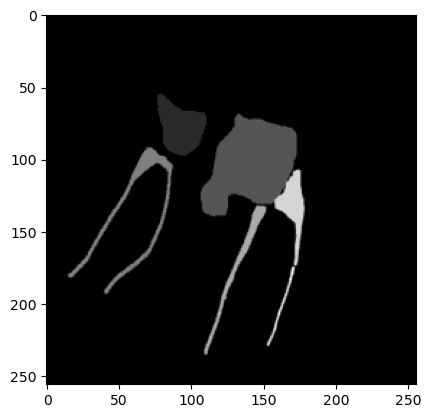

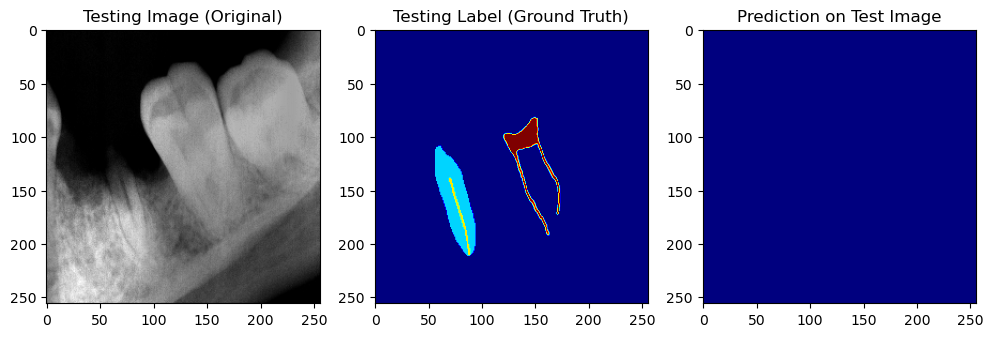

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.metrics import MeanIoU

# Step 1: Load the model and its weights
model = get_model()
model.load_weights('test.hdf5')  
# model.load_weights('sandstone_50_epochs_catXentropy_acc_with_weights.hdf5')

# Step 2: Predict using the test dataset (X_test)
y_pred = model.predict(X_test)
y_pred_argmax = np.argmax(y_pred, axis=3)

# Step 3: Calculate Mean IoU
n_classes = 10
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_test[:,:,:,0], y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())




plt.imshow(train_images[0, :,:,0], cmap='gray')
plt.imshow(train_masks[0], cmap='gray')


# Step 4: To calculate IoU for each class
confusion_matrix = IOU_keras.total_cm.numpy()  # Get the confusion matrix
print(confusion_matrix)

class_IoUs = []  # List to store IoU for each class

# Loop over each class (0 to n_classes - 1)
for i in range(n_classes):
    intersection = confusion_matrix[i, i]
    union = intersection + sum(confusion_matrix[i, :]) + sum(confusion_matrix[:, i]) - intersection
    IoU = intersection / union
    class_IoUs.append(IoU)

# Print IoU for each class
for i, IoU in enumerate(class_IoUs):
    print(f"IoU for class {i+1} is: {IoU}")

# Step 5: Visualize the results for a randomly selected test image
test_img_number = random.randint(0, len(X_test) - 1)  # Randomly select an image
test_img = X_test[test_img_number]  # The original test image
ground_truth = y_test[test_img_number]  # The ground truth label

# Preprocess the image for model prediction
test_img_input = np.expand_dims(test_img, axis=0)  # Expand dimensions for model input
prediction = model.predict(test_img_input)
predicted_img = np.argmax(prediction, axis=3)[0]  # Get the predicted class label

# Visualize the selected test image, ground truth, and prediction
plt.figure(figsize=(12, 8))

# Display the original test image
plt.subplot(231)
plt.title('Testing Image (Original)')
plt.imshow(test_img[:, :, 0], cmap='gray')

# Display the ground truth mask
plt.subplot(232)
plt.title('Testing Label (Ground Truth)')
plt.imshow(ground_truth[:, :, 0], cmap='jet')

# Display the predicted mask
plt.subplot(233)
plt.title('Prediction on Test Image')
plt.imshow(predicted_img, cmap='jet')

print(np.unique(predicted_img))
print(np.unique(prediction))

plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


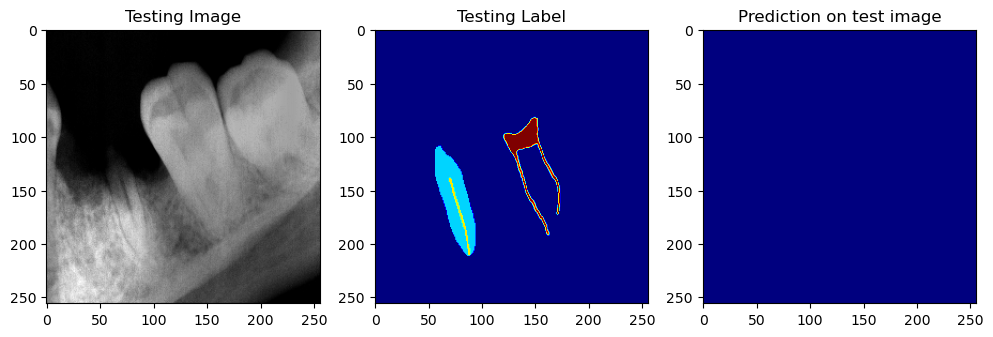

[0]


In [111]:
import random
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]


plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='jet')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img, cmap='jet')
plt.show()

print(np.unique(predicted_img))


(1156, 1600)


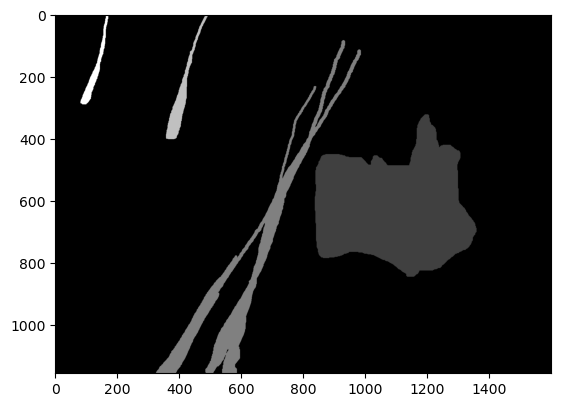

In [89]:
import tifffile as tiff
import matplotlib.pyplot as plt

# Load the OME-TIFF file
ome_tiff = tiff.imread('/Users/krishna/Desktop/stealth-startup/train1/combine_masks/DigX_01032006_164727_combined_mask.ome.tiff')

# Check the shape of the data
print(ome_tiff.shape)  # This will give you the dimensions

# If the data is 3D or more, select one slice to visualize
# For example, if it's 4D (time, z, x, y), use one slice of time and z
if len(ome_tiff.shape) > 2:
    image_slice = ome_tiff[0, 0]  # Adjust based on the shape
else:
    image_slice = ome_tiff

# Display the image
plt.imshow(image_slice, cmap='gray')
plt.show()
